In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

sample = pd.DataFrame([-0.18, -0.25, -0.26, -0.28, -0.38, -0.01, 0.16, 0.3, 0.16, 0.1, 0.23, -0.06, 0.1, 0.2, -0.03, 0.09, -0.12, -0.3, 0.23, 0.3, 0.39, 0.1, -0.07, 0.04, -0.04, 0.42, 0.43, 0.57, 0.31, 0.12, -0.01, -0.29, -0.3, -0.2, -0.15, -0.25, -0.49, -0.24, -0.11, 0.28, 0.08, -0.05, -0.34, -0.23, 0.12, 0.15, 0.02, 0.02, 0.25, 0.32, -0.03, -0.54, -0.4, 0.03, -0.03, -0.23, -0.32, -0.17, -0.26, -0.5, -0.24, -0.2, -0.24, 0.03, 0.21, 0.25, 0.05, -0.27, 0.02, 0.5, 0.59, -0.12, -0.14, -0.02, 0.14, 0.13, -0.13, -0.37, 0.07, 0.12, 0.1, 0.28, 0.07, -0.27, -0.25, 0.04, -0.23, -0.51, -0.65, -0.17, 0.29, 0.69, 0.39, 0.38, 0.56, 0.27, 0.1, -0.09, 0.15, 0.09], columns = ['timeseries_1'])
sample['timeseries_2'] = [-0.18, -0.12, -0.22, -0.17, -0.28, 0.15, -0.01, 0.33, -0.02, 0.12, 0.14, -0.16, 0.28, -0.02, -0.0, 0.17, -0.29, -0.08, 0.28, 0.02, 0.48, -0.17, 0.03, 0.01, -0.08, 0.53, 0.06, 0.61, -0.03, 0.18, -0.1, -0.23, -0.11, -0.16, -0.07, -0.19, -0.38, -0.04, -0.18, 0.4, -0.17, 0.1, -0.43, -0.0, 0.08, 0.08, 0.05, -0.01, 0.2, 0.18, -0.09, -0.43, -0.16, 0.02, -0.05, -0.1, -0.29, -0.07, -0.24, -0.32, -0.06, -0.28, -0.05, 0.06, 0.08, 0.21, -0.05, -0.23, 0.16, 0.33, 0.41, -0.25, 0.09, -0.21, 0.27, 0.05, -0.15, -0.26, 0.19, -0.09, 0.24, 0.16, -0.09, -0.14, -0.15, 0.05, -0.27, -0.26, -0.53, 0.06, 0.18, 0.6, 0.06, 0.41, 0.26, 0.1, 0.18, -0.2, 0.27, -0.08]


## AR or MA

In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our predictions.

Remember that for different types of models we expect the following behavior in the ACF and PACF:

AR(p)	MA(q)	    ARMA(p,q)
ACF	  Tails off	  Cuts off after lag q	Tails off
PACF  Cuts off after lag p	Tails off	Tails off


In [3]:
df = pd.DataFrame([1.62, -0.94, 0.08, -0.66, 0.74, -2.95, 2.14, -1.54, 0.3, -0.02, 1.38, -2.33, 0.45, -0.5, 0.5, -1.54, 0.27, -0.83, -0.16, 0.26, -1.47, 1.55, 0.52, 0.34, 1.41, -0.44, 0.43, -0.85, -0.32, 0.27, -1.16, -0.18, -0.66, -1.03, -0.83, -0.34, -1.57, 0.25, 1.27, 0.15, 0.23, -0.13, -0.4, 1.52, -0.78, -0.36, 0.84, 1.89, -0.43, 1.28, 0.84, -0.19, -0.8, -0.14, -0.59, 0.18, 0.55, 0.88, 0.53, 1.36, -0.57, 1.75, 0.3, -0.25, 1.08, -0.11, 1.2, 1.42, 2.2, -1.04, -0.05, 0.02, -0.59, 0.26, 0.04, -1.77, 0.46, 0.38, -0.63, 0.87, -0.06, 0.14, 0.39, 0.25, 0.11, 0.26, -0.51, 0.61, -0.12, 1.02, 1.12, 0.32, 0.29, -0.15, 0.49, -0.31, -0.42, 0.26, -0.71, 0.73, -0.76, 1.34, 0.23, 0.75, -0.73, 0.69, 0.56, -1.38, 0.2, 0.02, -1.75, 0.52, 0.38, -1.35, 0.87, -1.39, 0.07, -1.9, 1.04, -0.31, -0.25, -0.31, 1.54, 1.47, -2.1, 2.58, 1.41, -0.17, -0.41, 1.69, -0.61, -0.67, -0.9, 0.56, 0.13, -0.99, 1.05, -1.2, 1.0, -0.3, -0.3, 0.19, 0.85, 0.49, 0.61, 0.52, 0.43, 0.8, 0.17, 0.84, -0.19, -2.1, 1.64, 1.16, -0.41, 0.78, 0.67, 0.01, -0.03, -1.2, -0.32, -1.22, -0.04, -0.8, 0.33, -0.29, 1.08, 0.11, 2.39, -1.97, 0.45, 1.12, 1.59, -0.68, 1.12, 0.45, 1.32, -0.61, 1.07, -0.14, -1.09, 0.68, -0.04, 0.9, -0.12, -0.06, 1.04, -0.09, 0.22, 0.11, 1.33, 0.2, 2.16, 1.19, 1.12, -0.85, 1.46, 0.01, 0.42, 1.19, -0.24, 1.46, -0.53, 2.19, -1.64, -1.08, -1.11, -1.49, -1.96, 1.42, -1.32, -1.03, 1.87, -1.31, -1.19, 1.28, -0.1, -0.67, 1.94, -0.1, 1.88, 0.64, 1.98, 0.43, -0.62, 3.19, -1.37, 0.28, -0.09, -0.29, 0.01, -0.12, 0.63, 1.79, -0.22, -0.47, -0.43, -0.84, -2.27, 0.61, -1.37, -0.47, 0.16, -1.64, -0.68, 0.43, -0.19, -0.62, 2.29, -1.62, 0.33, -0.01, -3.24, 2.32, -0.93, -1.37, 2.95, -0.03, 0.61, 0.1, 0.53, -1.6, 0.95, -0.96, -0.01, 1.3, -0.03, 0.61, 0.67, -0.62, 1.14, 1.24, 0.48, 1.45, -0.36, -0.2, -1.27, 1.0, -1.19, 1.39, -0.77, 0.06, 0.37, 0.54, -0.23, 0.5, 0.27, 0.26, -1.08, 0.36, -0.48, -0.33, 0.47, -0.85, 0.18, -0.34, 0.25, 0.59, -1.08, 1.14, 1.9, -2.0, 0.26, -0.54, -0.79, 1.17, -0.66, -0.29, 1.25, -0.93, 1.22, 0.09, 1.48, -0.51, 3.67, 0.44, 1.2, 0.97, -0.27, -0.54, -0.2, -1.25, 0.14, -1.16, 0.63, 0.67, -0.96, 1.81, -0.4, 1.35, 0.49, 1.31, -0.74, 0.56, 1.51, -1.24, -1.51, -1.29, -2.91, -2.81, -1.32, -0.03, -1.46, 0.67, 0.08, -0.01, -0.11, -0.17, 0.45, -1.37, 1.33, 0.5, -0.43, 1.42, -0.64, -0.21, 0.29, -0.59, -0.52, -0.59, -0.61, 0.71, -2.5, 0.86, -0.61, 0.3, 0.4, -2.74, 1.51, -0.47, -0.7, -0.2, 1.05, -0.72, 2.03, 0.33, 2.45, -0.49, -0.79, 1.47, -0.05, -0.45, -1.08, 0.13, 0.26, -0.9, -0.03, -0.02, -0.99, -0.43, -1.65, 1.61, -1.42, 0.68, -0.73, 1.0, -2.2, 1.23, -0.54, 1.83, -1.46, 0.96, 0.59, 0.79, -0.54, 0.65, -1.92, -0.5, 0.0, 0.12, -0.62, 2.58, 1.6, 0.12, -1.26, -0.78, -1.16, 0.01, -0.68, -2.05, 0.62, 1.12, -1.39, -0.26, 2.58, -0.69, -0.1, 1.08, -0.18, -0.47, 1.4, 0.75, 0.85, 0.43, 1.75, -0.06, 0.79, 1.27, 0.73, 2.08, 0.65, -0.99, -0.15, 1.21, -1.45, 0.51, -0.62, 1.19, -0.72, 1.58, -0.64, 1.55, 0.73, -0.68, 1.78, -1.14, -0.53, 0.95, -1.29, -0.5, -0.2, -1.3, 0.96, -0.0, -0.18, 0.4, 0.63, 1.62, 0.62, -0.02, 1.67, -0.17, -0.09, 2.1, -0.89, 0.1, -1.42, -1.28, 0.0, -1.79, 0.37, -1.29, -0.6, 0.65, 0.76, 0.27, 1.72, 2.08, 1.24, -0.26, 0.9, 0.69, -0.85, 0.69, -1.6, -0.5, 0.36, -3.07, -0.75, -0.31, -2.72, 0.06, -1.33, -0.63, -0.42, -0.09, -0.77, 0.18, -0.73, 0.53, 1.43, -0.16, 0.81, -0.63, 1.04, -1.19, -0.8, 0.7, -0.4, 1.0, 1.44, -0.44, 1.0, 2.01, 0.49, 1.09, 1.98, -0.36, 1.36, 1.49, 1.35, -0.52, 0.82, 0.68, -0.68, -0.29, 0.79, -0.69, -1.63, 0.82, -1.14, -1.07, -1.44, 0.98, -3.12, -1.42, -0.3, 0.11, 0.47, -1.13, 0.81, -1.43, 0.91, -2.19, 0.0, 0.92, -0.91, 1.78, -0.92, 0.92, 0.96, -0.46, 1.78, 0.48, -1.37, 4.87, -0.47, 0.67, -0.04, 0.59, -0.86, 0.34, 0.13, 1.83, 0.08, 1.15, 0.87, -0.03, 0.11, 1.2, 0.46, -0.51, -0.42, 0.2, 0.65, -0.61, 2.08, -0.78, 0.81, -2.25, -0.28, -0.9, -0.36, 1.34, -0.25, 2.11, 0.89, 1.3, -0.03, 1.97, -1.19, 0.99, -0.96, -0.5, -1.49, -0.67, -0.14, -0.73, -1.38, 1.82, -0.38, 0.98, 1.13, -0.42, -1.27, -0.49, 0.63, -2.16, 1.12, -0.72, 0.44, -1.84, 1.47, -0.7, 0.7, 0.35, 1.01, 0.06, 1.06, -1.45, -0.59, 0.71, -0.96, -0.33, 0.07, 0.46, -0.82, 0.73, -1.05, -0.25, 0.94, 0.48, -1.14, 1.67, -1.21, 0.86, -2.11, -0.83, -0.64, -0.97, 0.97, 0.42, 1.77, 1.59, 0.22, 0.62, 1.4, -0.34, 0.08, -0.97, 0.13, -3.22, -0.33, -1.76, -0.09, -1.05, -0.32, 1.48, -1.56, 0.83, -1.87, 0.25, -0.08, 0.24, -0.92, 0.88, 0.24, -0.26, 0.35, 0.52, 0.34, -0.89, -0.74, 2.57, 0.76, -1.38, 2.06, 0.7, 0.34, 0.31, -0.54, 0.27, -0.69, -0.1, -0.5, -0.19, 1.0, 0.91, -1.16, 0.45, -0.68, 0.89, -0.68, 1.59, -0.42, 0.54, -1.06, 1.44, -1.02, -1.43, -0.01, -2.74, -0.19, -0.75, -0.44, 1.46, -0.48, 1.4, 0.51, -0.1, -1.7, 1.4, -1.37, -0.22, -1.14, 0.39, -0.32, -0.29, -0.02, 1.12, 0.72, 0.81, 3.78, -0.76, 0.95, -0.12, 0.35, -1.19, -2.73, -0.75, -0.7, -0.18, -2.1, 0.02, -0.18, -1.35, 0.45, -0.36, 0.26, -0.63, 1.78, -0.43, 1.54, -0.24, 1.07, -0.54, -0.77, -0.54, -0.39, -0.71, 1.36, -1.54, -0.46, 2.04, -0.4, -1.82, 1.57, -0.24, -2.61, 0.28, -0.52, -0.02, 0.69, 0.12, 1.52, -0.04, -0.49, -0.5, 0.43, -2.6, 0.95, -1.67, -0.52, 0.45, 0.68, -2.14, 0.1, -0.01, -1.43, 0.75, -2.42, 0.86, -0.01, -0.55, 1.33, -1.31, 1.7, -0.96, 0.83, -0.35, 0.89, 0.74, -1.47, 0.62, -0.27, -0.7, -0.78, 1.9, -0.46, 1.84, -0.26, -0.42, 0.64, -1.08, 2.22, -0.36, 1.65, 0.34, 0.14, 0.31, 0.2, 0.67, -0.19, -0.29, -0.71, -0.1, 0.06, -0.0, 0.04, -0.29, 0.4, 0.36, -0.29, 0.34, -0.01, 0.97, -0.63, 0.5, 0.5, 0.57, 1.52, 0.71, 1.13, -0.94, 1.28, 1.91, -1.55, 0.02, 0.43, 0.51, -0.05, -0.34, 0.52, 1.06, 0.31, 2.59, 1.03, 1.08, 1.57, -0.06, -0.62, 0.45, 0.06, -1.74, -0.04, -0.54, -0.24, -0.58, 0.47, 0.01, 1.1, -1.76, 2.35, 0.89, -0.25, 1.56, 0.92, -0.65, 0.69, 0.71, -0.02, 1.27, 0.21, 0.47, -0.44, -0.16, -0.59, 1.46, -0.35, -0.67, 1.18, -0.5, -3.2, 1.15, -2.62, 0.12, -1.4, -1.56, 0.67, -2.32, -0.44, -0.01, -0.01, 0.55, 0.06, -0.42, 2.3, -1.25, 2.25, -0.42, 1.61, 1.24, -1.05, 1.23, 0.69, 0.34, -0.01, 0.78, -0.3, -1.06, 1.19, -1.23, 1.44, 0.45, -0.77, 0.61, -0.34, -1.13, 0.54, -0.93, 1.62, 0.54, -0.71, 0.9, -0.23, -1.79, 1.17, 0.23, 0.55, -0.08, 1.72, -0.28, 1.16, 1.88, -0.0, -0.62, 0.55, 0.32, 0.57, -1.28, 0.59, 0.3, -0.01, 0.84, -0.93, 0.17, 1.08, -0.22, 0.55, 1.46, 0.13, 0.98, -0.05, -1.09, -0.96, -0.16, -1.01, -0.98, 0.41, -1.21, 0.19, -0.21, -1.07, -2.1, 1.66, -0.92, -2.98, 0.64, -0.23, -1.23, 0.62, -1.04, 0.48, -0.21, -0.41, -0.15, 0.17, 0.77, -0.72, 0.04, 0.36, -0.43, 0.34, 0.65, 1.23, -0.04, -1.65, 0.74, -0.35, -0.96], columns = ['y'])

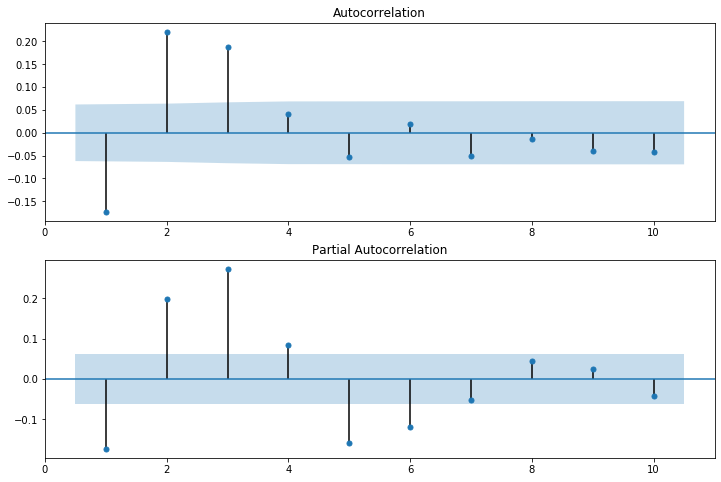

In [5]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

## Order of earthquakes
In this exercise you will use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.

AR(p)	MA(q)	ARMA(p,q)
ACF	Tails off	Cuts off after lag q	Tails off
PACF	Cuts off after lag p	Tails off	Tails off
The earthquakes time series earthquake, the plot_acf(), and plot_pacf() functions, and the SARIMAX model class are available in your environment.

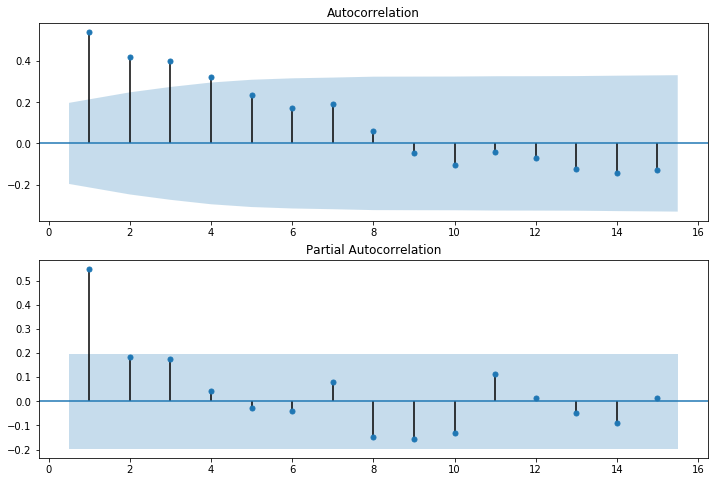

In [6]:
# Plot the ACF and the PACF of the earthquakes time series earthquake up to a lag of 15 steps and don't plot the zeroth lag.

earthquake = pd.read_csv('earthquakes.csv',
        index_col='date',
            parse_dates=True)

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

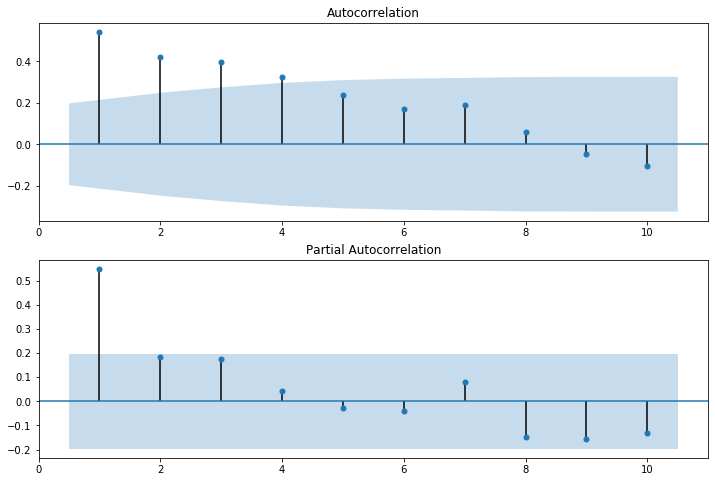

In [7]:
# Create a model object for the earthquakes time series. Select the most appropriate order using the ACF/PACF plots.

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=10, zero=False, ax=ax1)
plot_pacf(earthquake, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()


## Searching over model order

In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.



In [11]:
# Create empty list to store search results
import statsmodels.api as sm


order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = sm.tsa.statespace.SARIMAX(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


## Choosing order with AIC and BIC

Now that you have performed a search over many model orders, you will evaluate your results to find the best model order.

The list of tuples of (p,q, AIC value, BIC value) that you created in the last exercise, order_aic_bic, is available in your environment. pandas has also been imported as pd.

In [12]:
# Create a DataFrame to hold the order search information in the order_aic_bic list. Give it the column names ['p', 'q', 'AIC', 'BIC'].
# Print the DataFrame in order of increasing AIC and then BIC.

# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=["p", "q", "AIC", "BIC"])

# Print order_df in order of increasing AIC
print(order_df.sort_values("AIC"))

# Print order_df in order of increasing BIC
print(order_df.sort_values("BIC"))


   p  q          AIC          BIC
8  2  2  2808.210001  2832.748777
5  1  2  2817.192953  2836.823974
2  0  2  2872.089470  2886.812735
7  2  1  2889.304896  2908.935917
6  2  0  2930.057999  2944.781265
4  1  1  2960.058300  2974.781566
3  1  0  2968.931589  2978.747099
1  0  1  2978.421475  2988.236985
0  0  0  2996.231887  3001.139642
   p  q          AIC          BIC
8  2  2  2808.210001  2832.748777
5  1  2  2817.192953  2836.823974
2  0  2  2872.089470  2886.812735
7  2  1  2889.304896  2908.935917
6  2  0  2930.057999  2944.781265
4  1  1  2960.058300  2974.781566
3  1  0  2968.931589  2978.747099
1  0  1  2978.421475  2988.236985
0  0  0  2996.231887  3001.139642


## AIC and BIC vs ACF and PACF

In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results. The ACF and PACF plots for this dataset are shown below.

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

earthquake = pd.read_csv('earthquakes.csv',
        index_col='date',
            parse_dates=True)

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquake, order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


0 0 888.4297722924081 891.0248921425426
0 1 799.6741727812184 804.8644124814876


c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


0 2 761.0674787503882 768.852838300792
1 0 666.6455255041611 671.8357652044303
1 1 647.132299967382 654.9176595177858


c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


1 2 648.7385664620793 659.1190458626177
2 0 656.0283744146392 663.813733965043
2 1 648.8428399959611 659.2233193964994


c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


2 2 648.8506443429297 661.8262435936027


## Mean absolute error

Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series



c:\users\user\anaconda3\envs\python3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


4.755625670269315


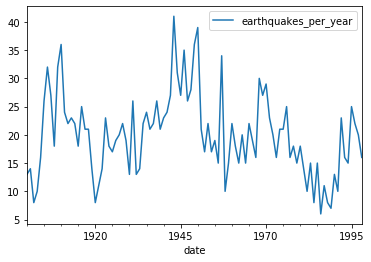

In [17]:
# Fit model
model = SARIMAX(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

## Diagnostic summary statistics

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

In [18]:
# Create and fit model
model2 = SARIMAX(df, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1462.029
Date:                Fri, 28 Feb 2020   AIC                           2930.058
Time:                        14:54:34   BIC                           2944.781
Sample:                             0   HQIC                          2935.654
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1362      0.031     -4.402      0.000      -0.197      -0.076
ar.L2          0.2003      0.032      6.350      0.000       0.138       0.262
sigma2         1.0899      0.043     25.374      0.0

## Plot diagnostics

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use 4 common plots to decide whether a model is a good fit to some data.

Here is a reminder of what you would like to see in each of the plots for a model that fits well:

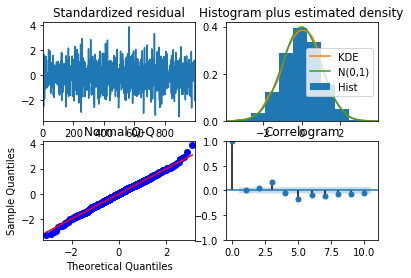

In [19]:
# Create and fit model
model = SARIMAX(df, order=(1,1,1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

## Identification

In the following exercises you will apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts.

You will be using a new time series. This is the personal savings as % of disposable income 1955-1979 in the US.

The first step of the Box-Jenkins methodology is Identification. In this exercise you will use the tools at your disposal to test whether this new time series is stationary.

In [21]:
savings = pd.DataFrame([4.9, 5.2, 5.7, 5.7, 6.2, 6.7, 6.9, 7.1, 6.6, 7.0, 6.9, 6.4, 6.6, 6.4, 7.0, 7.3, 6.0, 6.3, 4.8, 5.3, 5.4, 4.7, 4.9, 4.4, 5.1, 5.3, 6.0, 5.9, 5.9, 5.6, 5.3, 4.5, 4.7, 4.6, 4.3, 5.0, 5.2, 6.2, 5.8, 6.7, 5.7, 6.1, 7.2, 6.5, 6.1, 6.3, 6.4, 7.0, 7.6, 7.2, 7.5, 7.0, 7.6, 7.2, 7.5, 7.8, 7.2, 7.5, 5.6, 5.7, 4.9, 5.1, 6.2, 6.0, 6.1, 7.5, 7.8, 8.0, 8.0, 8.1, 7.6, 7.1, 6.6, 5.6, 5.9, 6.6, 6.8, 7.8, 7.9, 8.7, 7.7, 7.3, 6.7, 7.5, 6.4, 9.7, 7.5, 7.1, 6.4, 6.0, 5.7, 5.0, 4.2, 5.1, 5.4, 5.1, 5.3, 5.0, 4.8, 4.7, 5.0, 5.4], columns = ['savings'])

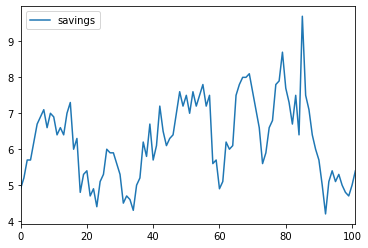

-3.18589909624214
0.020815541644114133


In [22]:
from statsmodels.tsa.stattools import adfuller

# Plot time series
fig, ax = plt.subplots()
savings.plot(ax = ax)
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings.savings)

# Print test statistic
print(result[0])
# Print p-value
print(result[1])


## Identification II

You learned that the savings time series is stationary without differencing. Now that you have this information you can try and identify what order of model will be the best fit.

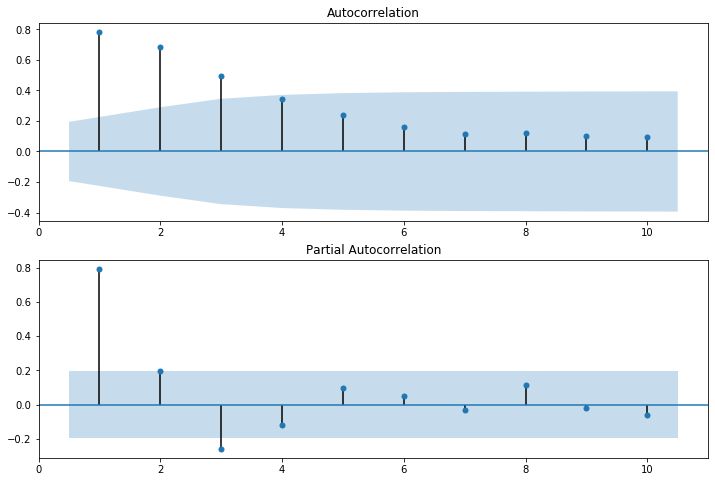

In [23]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero = False, ax = ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero = False, ax = ax2)

plt.show()

## Estimation

In the last exercise, the ACF and PACF were a little inconclusive. The results suggest your data could be an ARMA(p,q) model or could be an imperfect AR(3) model. In this exercise you will search over models over some model orders to find the best one according to AIC.

In [24]:
# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = SARIMAX(savings, order=(p,0,q), trend="c")
        results = model.fit()
        
        # Print p, q, AIC, BIC
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)

0 0 313.6028657326894 318.85281135925794
0 1 267.069709768869 274.94462820872184
0 2 232.16782676455588 242.66771801769298
0 3 217.59720511188743 230.7220691783088
1 0 216.20348062499974 224.07839906485256
1 1 215.70038988615389 226.20028113929098
1 2 207.65298608432522 220.7778501507466
1 3 209.57498691601734 225.32482379572298
2 0 213.97232327543946 224.47221452857656
2 1 213.4303567908074 226.55522085722873
2 2 209.57903436789553 225.32887124760117
2 3 211.57503208965198 229.94984178264187
3 0 209.5449310791195 222.66979514554083
3 1 210.82147634941808 226.5713132291237
3 2 211.4575988181992 229.83240851118907
3 3 213.54388854270192 234.54367104897608


## Diagnostics

You have arrived at the model diagnostic stage. So far you have found that the initial time series was stationary, but may have one outlying point. You identified promising model orders using the ACF and PACF and confirmed these insights by training a lot of models and using the AIC and BIC.

You found that the ARMA(1,2) model was the best fit to our data and now you want to check over the predictions it makes before you would move it into production.



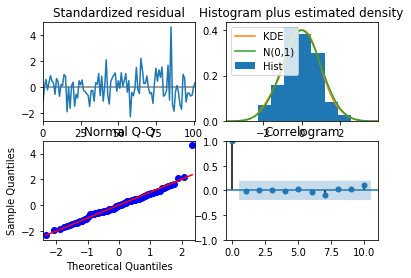

In [25]:
# Create and fit model
model = SARIMAX(savings, order=(1,0,2), trend = "c")
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()
